<a href="https://colab.research.google.com/github/oscarlundberg95/ADL/blob/main/ADL_Excercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Download and prepare CIFAR-10 dataset*

**Approach for image recogniztion**
* Normalize the image pixel values (divide by 255)
* One-Hot Encode the categorical column
* Build a model architecture (Sequential) with Dense layers(Fully connected layers)
* Train the model and make predictions

In [23]:
%load_ext tensorboard
import datetime
from tensorboard.plugins.hparams import api as hp
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# loading cifar10 and shape + type assert to be sure
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# one-hot encoding categories
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
# normalizing
x_train /= 255
x_test /= 255

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


#**All the models are the same except for optimizer and activation functions. As well as run with the same batch size of 128 and 10 epochs**






In [32]:
# Logging for TensorBoard
%reload_ext tensorboard

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)
hparams_callback = hp.KerasCallback(log_dir, {
    'num_relu_units': 512,
    'dropout': 0.2
})

# LeakyReLU + SGD
## Results: val accuracy ~ 9,95%


* *Write a simple CNN network for classifying images*
  - *use LeakyReLU as the activation function*
  - *use SGD as the optimizer and 0.0001 as the learning rate, and keep all default param-eters*
– *Report the accuracy on the test set*

In [33]:
# Logging for TensorBoard
%reload_ext tensorboard

# linear stack of layers
model = Sequential()
# layer 1
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='LeakyReLU', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(1,1)))
#model.add(Dropout(0.2))
model.add(Flatten())
# hidden + output
model.add(Dense(100, activation='LeakyReLU'))
model.add(Dense(10, activation='LeakyReLU'))

# compiling the model
opt = keras.optimizers.SGD(learning_rate=0.0001)
loss = keras.losses.CategoricalCrossentropy()
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

# lol

# training the model for x epochs
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test), callbacks=[tensorboard_callback, hparams_callback])

Epoch 1/10
391/391 [==============================] - 7s 16ms/step - loss: 4.9365 - accuracy: 0.0998 - val_loss: 4.8191 - val_accuracy: 0.1021
Epoch 2/10
391/391 [==============================] - 6s 15ms/step - loss: 4.7240 - accuracy: 0.1204 - val_loss: 4.6064 - val_accuracy: 0.1398
Epoch 3/10
391/391 [==============================] - 6s 16ms/step - loss: 7.1839 - accuracy: 0.1149 - val_loss: 8.2097 - val_accuracy: 0.1001
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 8.4003 - accuracy: 0.1004 - val_loss: 8.4405 - val_accuracy: 0.1008
Epoch 5/10
391/391 [==============================] - 4s 10ms/step - loss: 8.2988 - accuracy: 0.1007 - val_loss: 8.3611 - val_accuracy: 0.1010
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 8.2305 - accuracy: 0.1008 - val_loss: 8.2529 - val_accuracy: 0.1014
Epoch 7/10
391/391 [==============================] - 4s 10ms/step - loss: 8.2101 - accuracy: 0.1007 - val_loss: 8.1835 - val_accuracy: 0.1016

# LeakyReLU + Adam
## Results: val accuracy ~ 31%


*Change the optimiser to Adam and run again the experiment. Report accuracy on test set.*


In [31]:
# Logging for TensorBoard
%reload_ext tensorboard

# linear stack of layers
model = Sequential()
# layer 1
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='LeakyReLU', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(1,1)))
#model.add(Dropout(0.2))
model.add(Flatten())
# hidden + output
model.add(Dense(100, activation='LeakyReLU'))
model.add(Dense(10, activation='LeakyReLU'))

# compiling the model
opt = keras.optimizers.Adam(learning_rate=0.0001)
loss = keras.losses.CategoricalCrossentropy()
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

# training the model for x epochs
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test), callbacks=[tensorboard_callback, hparams_callback])

Epoch 1/10
391/391 [==============================] - 8s 14ms/step - loss: 7.9570 - accuracy: 0.1431 - val_loss: 7.8737 - val_accuracy: 0.1377
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 7.9366 - accuracy: 0.1414 - val_loss: 7.8624 - val_accuracy: 0.1391
Epoch 3/10
391/391 [==============================] - 4s 10ms/step - loss: 8.0110 - accuracy: 0.1441 - val_loss: 7.9075 - val_accuracy: 0.1396
Epoch 4/10
391/391 [==============================] - 6s 16ms/step - loss: 8.0139 - accuracy: 0.1441 - val_loss: 7.9075 - val_accuracy: 0.1396
Epoch 5/10
391/391 [==============================] - 5s 12ms/step - loss: 8.0139 - accuracy: 0.1441 - val_loss: 7.9075 - val_accuracy: 0.1396
Epoch 6/10
391/391 [==============================] - 3s 8ms/step - loss: 8.0139 - accuracy: 0.1441 - val_loss: 7.9075 - val_accuracy: 0.1396
Epoch 7/10
391/391 [==============================] - 3s 8ms/step - loss: 8.0139 - accuracy: 0.1441 - val_loss: 7.9075 - val_accuracy: 0.1396
E

# Tanh + SGD
## Results: val accuracy ~ 5%

*Swap the LeakyReLUs for Tanh. Then run again the experiment and report accuracy on test set. Make a separate file for this experiment.*


In [26]:
# Logging for TensorBoard
%reload_ext tensorboard

# linear stack of layers
model = Sequential()
# layer 1
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='tanh', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(1,1)))
#model.add(Dropout(0.2))
model.add(Flatten())
# hidden + output
model.add(Dense(100, activation='tanh'))
model.add(Dense(10, activation='tanh'))

# compiling the model
opt = keras.optimizers.SGD(learning_rate=0.0001)
loss = keras.losses.CategoricalCrossentropy()
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

# training the model for x epochs
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test), callbacks=[tensorboard_callback, hparams_callback])

Epoch 1/10
391/391 [==============================] - 4s 9ms/step - loss: 4.7840 - accuracy: 0.1081 - val_loss: 4.5675 - val_accuracy: 0.1094
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 5.8754 - accuracy: 0.1062 - val_loss: 8.0518 - val_accuracy: 0.1044
Epoch 3/10
391/391 [==============================] - 5s 12ms/step - loss: 7.6307 - accuracy: 0.1038 - val_loss: 6.5523 - val_accuracy: 0.1078
Epoch 4/10
391/391 [==============================] - 5s 12ms/step - loss: 7.4729 - accuracy: 0.1061 - val_loss: 7.2520 - val_accuracy: 0.1092
Epoch 5/10
391/391 [==============================] - 6s 14ms/step - loss: 8.0357 - accuracy: 0.1044 - val_loss: 7.8707 - val_accuracy: 0.1038
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 7.7936 - accuracy: 0.1038 - val_loss: 7.5815 - val_accuracy: 0.1036
Epoch 7/10
391/391 [==============================] - 3s 7ms/step - loss: 7.5138 - accuracy: 0.1025 - val_loss: 6.6050 - val_accuracy: 0.1000
E

# Tanh + Adam
## Results: val accuracy ~ 11%

In [29]:
# Logging for TensorBoard
%reload_ext tensorboard

# linear stack of layers
model = Sequential()
# layer 1
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='tanh', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(1,1)))
#model.add(Dropout(0.2))
model.add(Flatten())
# hidden + output
model.add(Dense(100, activation='tanh'))
model.add(Dense(10, activation='tanh'))

# compiling the model
opt = keras.optimizers.Adam(learning_rate=0.0001)
loss = keras.losses.CategoricalCrossentropy()
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

# training the model for x epochs
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test), callbacks=[tensorboard_callback, hparams_callback])

Epoch 1/10
391/391 [==============================] - 7s 14ms/step - loss: 7.4386 - accuracy: 0.1110 - val_loss: 8.0591 - val_accuracy: 0.1108
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 8.0591 - accuracy: 0.1105 - val_loss: 8.0591 - val_accuracy: 0.1127
Epoch 3/10
391/391 [==============================] - 4s 10ms/step - loss: 8.0591 - accuracy: 0.1112 - val_loss: 8.0590 - val_accuracy: 0.1128
Epoch 4/10
391/391 [==============================] - 4s 9ms/step - loss: 8.0591 - accuracy: 0.1114 - val_loss: 8.0590 - val_accuracy: 0.1128
Epoch 5/10
391/391 [==============================] - 5s 13ms/step - loss: 8.0591 - accuracy: 0.1114 - val_loss: 8.0590 - val_accuracy: 0.1126
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 8.0591 - accuracy: 0.1116 - val_loss: 8.0590 - val_accuracy: 0.1125
Epoch 7/10
391/391 [==============================] - 3s 8ms/step - loss: 8.0590 - accuracy: 0.1116 - val_loss: 8.0590 - val_accuracy: 0.1125
E

*Visualize the results of these runs on a Tensorboard. Just put any screenshot of the web interface with the experiments to prove you got it working is enough. (for example- show the training loss on tensorboard)*

In [37]:
# Clear TensorBoard logs
!rm -rf /content/logs

In [34]:
#################### TO ADD #######################################
!tensorboard dev upload --logdir ./logs \
  --name "test1" \
  --description "test1" \
  --one_shot

##################### TO DELETE ###################################
# You must replace YOUR_EXPERIMENT_ID with the value output from the previous
# tensorboard `list` command or `upload` command.  For example
# `tensorboard dev delete --experiment_id pQpJNh00RG2Lf1zOe9BrQA`

## !tensorboard dev delete --experiment_id YOUR_EXPERIMENT_ID_HERE

2023-04-18 07:41:15.374601: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/VlzYJpIpT9mzY79KZm7SyA/

[2023-04-18T07:41:17] Started scanning logdir.
[2023-04-18T07:41:25] Total uploaded: 360 scalars, 372 tensors (258.5 kB), 6 binary objects (324.8 kB)
[2023-04-18T07:41:25] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/VlzYJpIpT9mzY79KZm7SyA/


**Leaky+SGD**
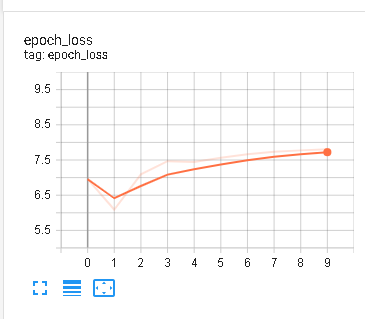

**Leaky + Adam**
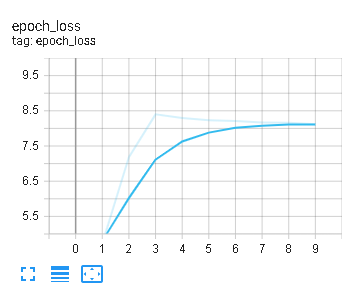

**Tahn + SGD**
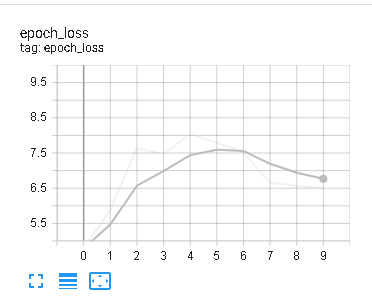

**Tahn + Adam**
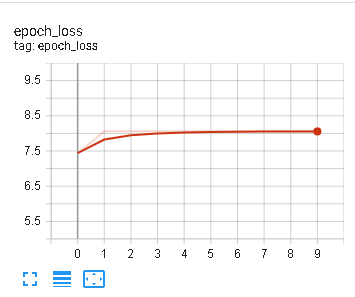